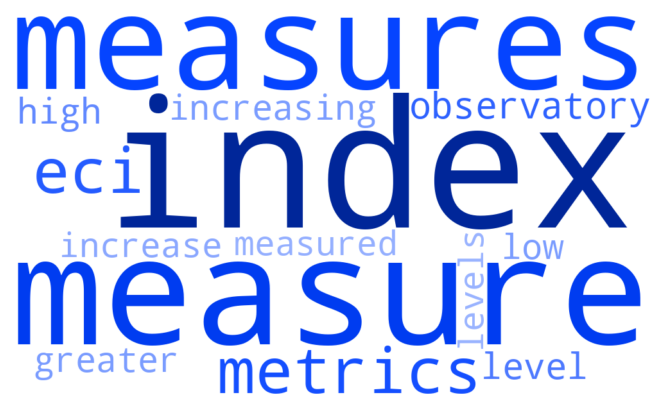

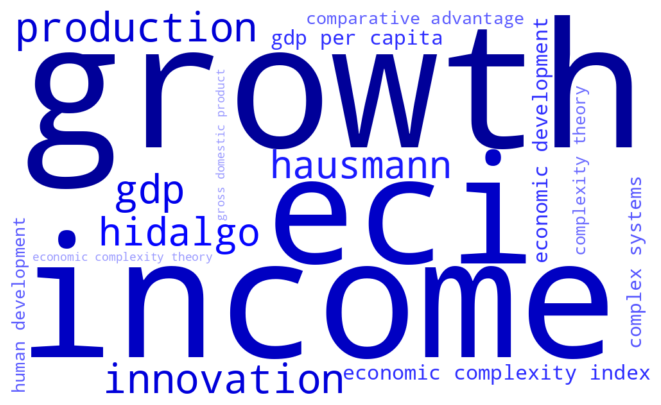

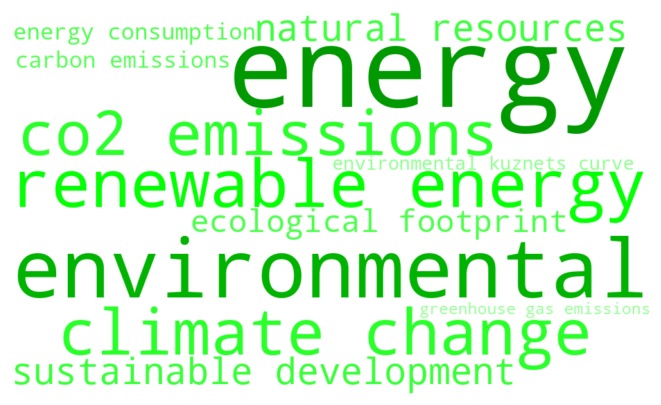

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

collocations_pattern_1_measure = {
    'index':998748,
    'measure':244847,
    'measures':174532,
    'metrics':133947,
    'eci':105265,
    'observatory':82318,
    'level':49476,
    'high':35954,
    'low':24345,
    'greater':23747,
    'increasing':23227,
    'increase':17381,
    'measured':15517,
    'levels':13420
}

growth = {
    'growth':1895,
    'eci':1034,
    'economic complexity index':253,
    'income':1094,
    'gdp':642,
    'gross domestic product':52,
    'gdp per capita':247,
    'innovation':799,
    'hidalgo':433,
    'production':838,
    'hausmann':335,
    'economic development':251,
    'human development':129,
    'complex systems':140,
    'comparative advantage':131,
    'complexity theory':106,
    'economic complexity theory':55
}

ecology = {
    'energy':1042,
    'renewable energy':274,
    'co2 emissions':174,
    'carbon emissions':101,
    'greenhouse gas emissions':41,
    'sustainable development':147,
    'environmental':772,
    'climate change':179,
    'natural resources':136,
    'ecological footprint':114,
    'energy consumption':110,
    'environmental kuznets curve':49
}

themes = [collocations_pattern_1_measure, growth, ecology]
hues = ['225', '240', '120']

for theme, hue in zip(themes, hues):
    log_freq = {word: np.log1p(freq) for word, freq in theme.items()}

    min_log_freq = min(log_freq.values())
    max_log_freq = max(log_freq.values())

    def gradient_red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        # Map the frequency of the word to a lightness value (darker for more frequent words)
        frequency = log_freq[word]
        lightness = 80 - int(50 * (frequency - min_log_freq) / (max_log_freq - min_log_freq))  # Adjust lightness range
        return f"hsl({hue}, 100%, {lightness}%)"

    # Create a word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='white', color_func=gradient_red_color_func).generate_from_frequencies(log_freq)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()